
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







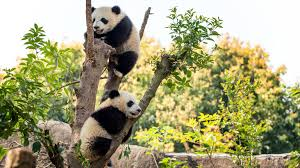


In [1]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [2]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [2]:
pca_regional_drug_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [3]:
pca_regional_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [5]:
import pandas as pd

# Load dataset
df_drug = pd.read_csv('BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


# Filter dataset for only confirmed antidepressants
df_antidepressants_filtered = df_drug[df_drug["BNF_CHEMICAL_SUBSTANCE"].isin(confirmed_antidepressants)]

# Aggregate total prescriptions (ITEMS) by drug
top_10_antidepressants_filtered = (
    df_antidepressants_filtered.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Convert to DataFrame for display
top_10_antidepressants_filtered_df = top_10_antidepressants_filtered.reset_index()

# Print results
print(top_10_antidepressants_filtered_df)


        BNF_CHEMICAL_SUBSTANCE     ITEMS
0     Sertraline hydrochloride  85402251
1  Amitriptyline hydrochloride  59272937
2      Citalopram hydrobromide  52891620
3                  Mirtazapine  46335570
4     Fluoxetine hydrochloride  28211759
5                  Venlafaxine  21447209
6     Duloxetine hydrochloride  14262656
7                 Escitalopram   6580386
8     Paroxetine hydrochloride   4886615
9      Trazodone hydrochloride   4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [6]:

# Filter dataset for only Mirtazapine prescriptions
df_mirtazapine = df_drug[df_drug["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"]

# Aggregate total cost by month
monthly_mirtazapine_cost = (
    df_mirtazapine.groupby("YEAR_MONTH")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="YEAR_MONTH")
)

# Print results
print(monthly_mirtazapine_cost)


    YEAR_MONTH        COST
0       202101  2380030.90
1       202102  2249220.63
2       202103  2523008.14
3       202104  2039348.02
4       202105  1935629.32
5       202106  2055820.88
6       202107  1609248.23
7       202108  1539582.17
8       202109  1621383.70
9       202110  1356643.04
10      202111  1429072.08
11      202112  1496540.76
12      202201  1174913.49
13      202202  1094983.89
14      202203  1248772.91
15      202204  1141081.07
16      202205  1190452.94
17      202206  1155918.28
18      202207  1060524.71
19      202208  1097570.56
20      202209  1107894.62
21      202210  1096392.40
22      202211  1125694.74
23      202212  1153658.07
24      202301  1137624.14
25      202302  1046988.40
26      202303  1202506.98
27      202304  1076691.16
28      202305  1151848.40
29      202306  1170895.45
30      202307  1067405.39
31      202308  1093233.80
32      202309  1083696.99
33      202310  1137520.24
34      202311  1197370.59
35      202312  1189870.33
3

### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [10]:
# Filter dataset for Sertraline hydrochloride in the Midlands region
df_sertraline_midlands = df_drug[
    (df_drug["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") & 
    (df_drug["REGION_NAME"] == "MIDLANDS")
]

# Aggregate total cost by year
annual_sertraline_cost = (
    df_sertraline_midlands.groupby("YEAR")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="YEAR")
)

# Print results
print(annual_sertraline_cost)

   YEAR         COST
0  2021  17477276.46
1  2022   6433863.59
2  2023   7600322.04
3  2024   8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

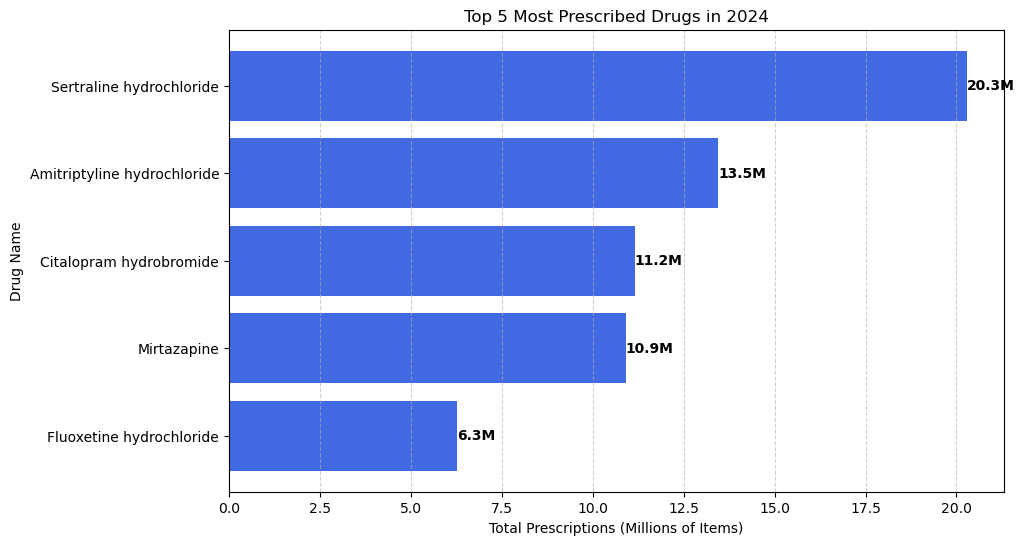

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter dataset for 2024
df_2024 = df_drug[df_drug["YEAR"] == 2024]

# Aggregate total prescriptions (ITEMS) by drug
top_5_drugs_2024 = (
    df_2024.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_drugs_2024.index[::-1], top_5_drugs_2024.values[::-1], color="royalblue")
plt.xlabel("Total Prescriptions (Items)")
plt.ylabel("Drug Name")
plt.title("Top 5 Most Prescribed Drugs in 2024")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()


### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


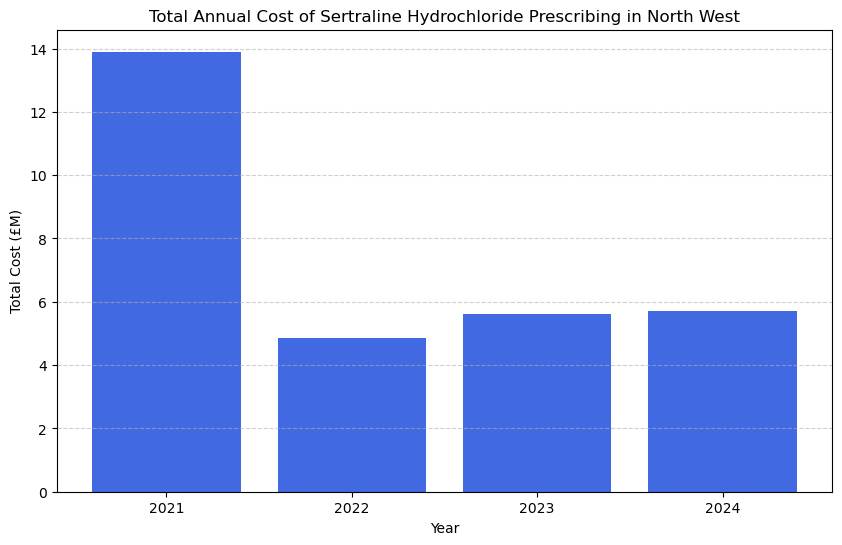

In [20]:

# Filter dataset for Sertraline hydrochloride in the North West region
df_sertraline_northwest = df_drug[
    (df_drug["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") & 
    (df_drug["REGION_NAME"] == "NORTH WEST")
]

# Aggregate total cost by year
annual_sertraline_cost = (
    df_sertraline_northwest.groupby("YEAR")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="YEAR")
)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_sertraline_cost["YEAR"], annual_sertraline_cost["COST"], color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Cost (£)")
plt.title("Total Annual Cost of Sertraline Hydrochloride Prescribing in North West")
plt.xticks(annual_sertraline_cost["YEAR"])  # Ensure all years are displayed
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()




### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

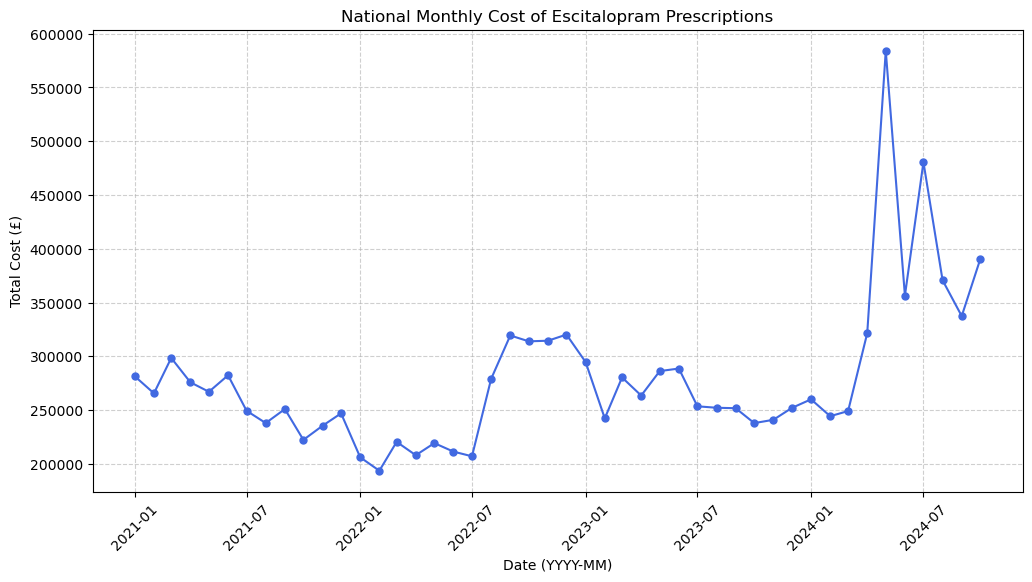

In [21]:

import datetime


# Filter dataset for Escitalopram prescriptions
df_escitalopram = df_drug[df_drug["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"]

# Aggregate total cost by month, rounding to the nearest pound
monthly_escitalopram_cost = (
    df_escitalopram.groupby("YEAR_MONTH")["COST"]
    .sum()
    .round()
    .reset_index()
    .sort_values(by="YEAR_MONTH")
)

# Convert YEAR_MONTH to a proper date format
monthly_escitalopram_cost["DATE"] = monthly_escitalopram_cost["YEAR_MONTH"].astype(str)
monthly_escitalopram_cost["DATE"] = pd.to_datetime(monthly_escitalopram_cost["DATE"], format="%Y%m")

# Plot  line chart
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_escitalopram_cost["DATE"],
    monthly_escitalopram_cost["COST"],
    marker="o",
    linestyle="-",
    color="royalblue",
    markersize=5
)

# Formatting improvements
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Total Cost (£)")
plt.title("National Monthly Cost of Escitalopram Prescriptions")
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

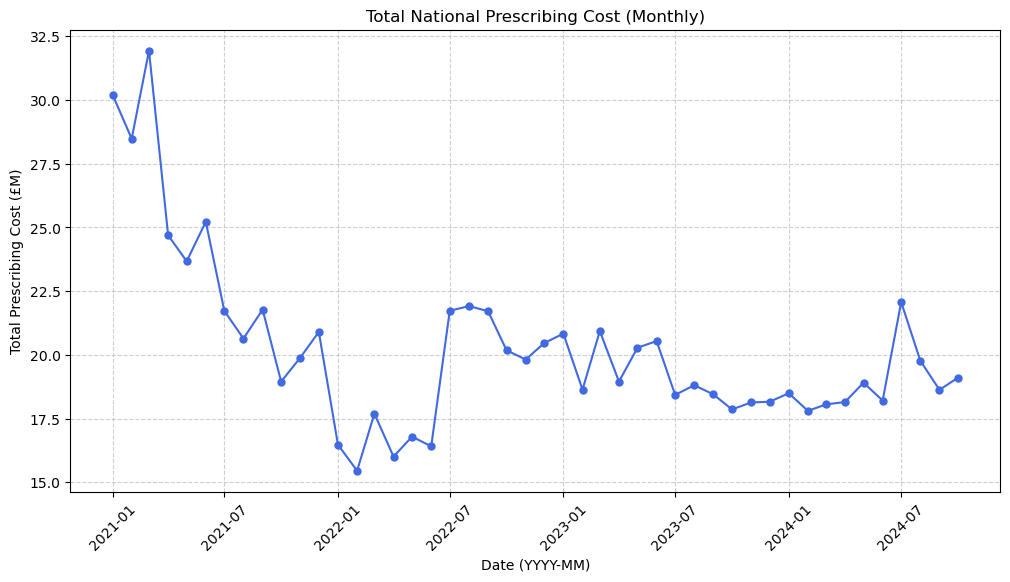

In [28]:
# Aggregate total national prescribing cost by month
monthly_national_cost = (
    df_drug.groupby("YEAR_MONTH")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="YEAR_MONTH")
)

# Convert YEAR_MONTH to a proper date format for better visualization
monthly_national_cost["DATE"] = monthly_national_cost["YEAR_MONTH"].astype(str)
monthly_national_cost["DATE"] = pd.to_datetime(monthly_national_cost["DATE"], format="%Y%m")

# Convert COST to millions for better readability
monthly_national_cost["COST"] = monthly_national_cost["COST"] / 1e6

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_national_cost["DATE"],
    monthly_national_cost["COST"],
    marker="o",
    linestyle="-",
    color="royalblue",
    markersize=5
)

# Formatting
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Total Prescribing Cost (£M)")
plt.title("Total National Prescribing Cost (Monthly)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [36]:
# Aggregate total national prescribing cost by month
monthly_national_cost = df_drug.groupby(["YEAR_MONTH"])["COST"].sum().reset_index()

# Extract year from YEAR_MONTH
monthly_national_cost["YEAR"] = monthly_national_cost["YEAR_MONTH"] // 100

# Convert COST to millions for better readability
monthly_national_cost["COST"] = monthly_national_cost["COST"] / 1e6

# Compute annual summary statistics
annual_summary = (
    monthly_national_cost.groupby("YEAR")["COST"]
    .describe(percentiles=[0.25, 0.5, 0.75])  # Includes min, Q1 (25%), median (50%), Q3 (75%), max
    .rename(columns={'25%': 'Q1', '50%': 'Median', '75%': 'Q3'})
    [["min", "Q1", "Median", "Q3", "max"]]
)

# Print the summary statistics
print(annual_summary)


            min         Q1     Median         Q3        max
YEAR                                                       
2021  18.949756  20.835485  22.724240  26.036580  31.933610
2022  15.453991  16.458373  18.754197  20.776870  21.914897
2023  17.859075  18.362788  18.722910  20.344160  20.934042
2024  17.802905  18.163828  18.560027  19.056284  22.071625



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

C:\Users\karan\AppData\Local\Temp\ipykernel_5480\1379115710.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="YEAR", y="COST", data=monthly_national_cost, palette="Blues")


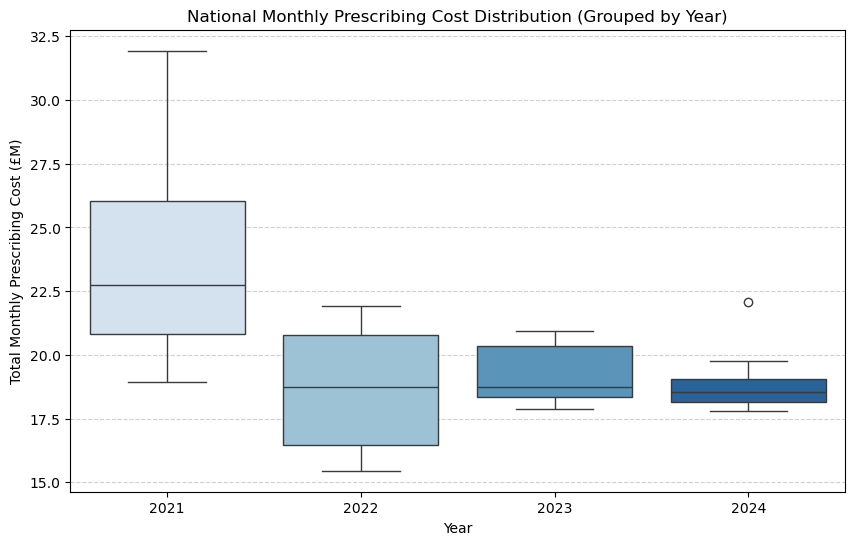

In [34]:

# Aggregate total national prescribing cost by month
monthly_national_cost = df_drug.groupby(["YEAR_MONTH"])["COST"].sum().reset_index()

# Extract year from YEAR_MONTH
monthly_national_cost["YEAR"] = monthly_national_cost["YEAR_MONTH"] // 100

# Convert COST to millions for better readability
monthly_national_cost["COST"] = monthly_national_cost["COST"] / 1e6

# Create a grouped boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="YEAR", y="COST", data=monthly_national_cost, palette="Blues")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Monthly Prescribing Cost (£M)")
plt.title("National Monthly Prescribing Cost Distribution (Grouped by Year)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

Annual Mean Monthly Prescribing Cost (£):
   YEAR           COST
0  2021  240082.708200
1  2022  187207.038517
2  2023  191678.049883
3  2024  189188.929490


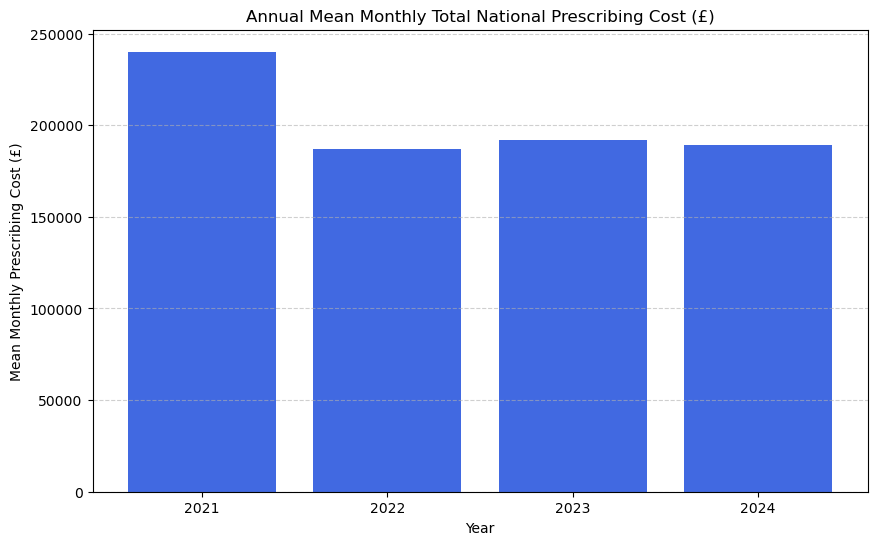

In [33]:


# Aggregate total national prescribing cost by month
monthly_national_cost = df_drug.groupby(["YEAR_MONTH"])["COST"].sum().reset_index()

# Convert COST to pounds (£) if values are in pence
monthly_national_cost["COST"] = monthly_national_cost["COST"] / 100  # Convert to pounds (£)

# Extract year from YEAR_MONTH
monthly_national_cost["YEAR"] = monthly_national_cost["YEAR_MONTH"] // 100

# Compute the annual mean monthly prescribing cost (in £)
annual_mean_cost = (
    monthly_national_cost.groupby("YEAR")["COST"]
    .mean()
    .reset_index()
    .sort_values(by="YEAR")
)

# Display the amount in the console
print("Annual Mean Monthly Prescribing Cost (£):")
print(annual_mean_cost)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_mean_cost["YEAR"], annual_mean_cost["COST"], color="royalblue")

# Formatting
plt.xlabel("Year")
plt.ylabel("Mean Monthly Prescribing Cost (£)")
plt.title("Annual Mean Monthly Total National Prescribing Cost (£)")
plt.xticks(annual_mean_cost["YEAR"])  # Ensure all years are displayed
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [40]:
import pandas as pd

# Load dataset
df_drug = pd.read_csv('BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


# Pivot table: Cost of all prescribed drugs per region per year
pivot_table = df_drug.pivot_table(values="COST", index="YEAR", columns="REGION_NAME", aggfunc="sum")

display(pivot_table)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv"
df = pd.read_csv(file_path)

## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

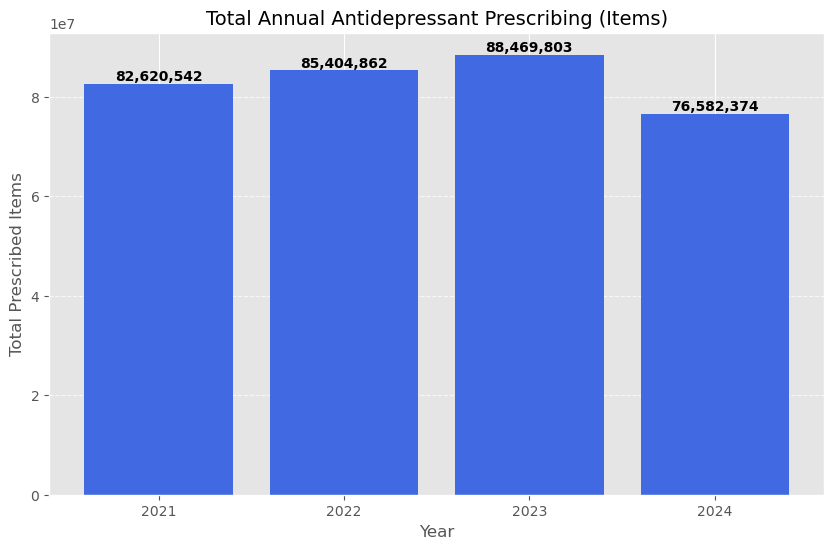

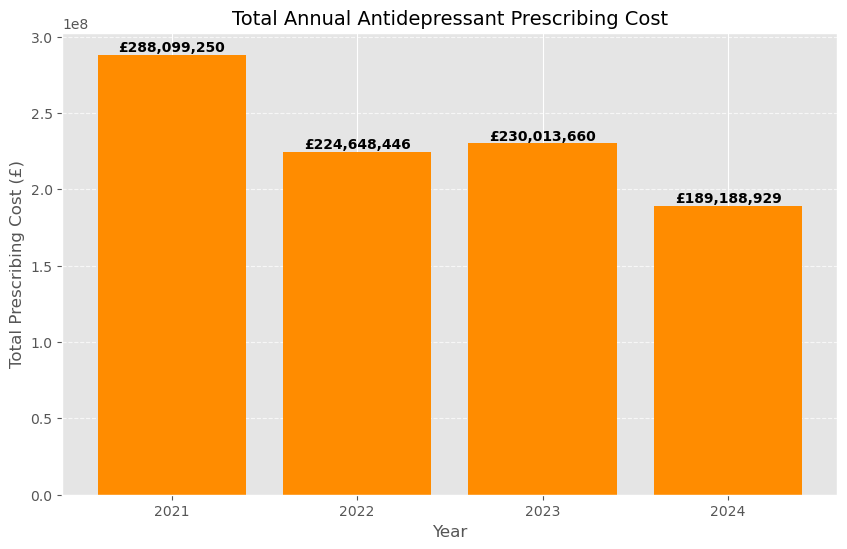

In [45]:
# Part 1: Total Annual Prescribing (Items and Cost)
annual_items = df.groupby("YEAR")["ITEMS"].sum()
annual_cost = df.groupby("YEAR")["COST"].sum()

# Improve plot aesthetics
plt.style.use("ggplot")

# Plot total annual antidepressant prescribing (items)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(annual_items.index, annual_items, color="royalblue")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Prescribed Items", fontsize=12)
ax.set_title("Total Annual Antidepressant Prescribing (Items)", fontsize=14)
ax.set_xticks(annual_items.index)
ax.set_xticklabels(annual_items.index, fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Plot total annual antidepressant prescribing cost
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(annual_cost.index, annual_cost, color="darkorange")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Prescribing Cost (£)", fontsize=12)
ax.set_title("Total Annual Antidepressant Prescribing Cost", fontsize=14)
ax.set_xticks(annual_cost.index)
ax.set_xticklabels(annual_cost.index, fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"£{height:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


### **📊 Longitudinal Analysis of Antidepressant Prescribing**  

Over the past four years, antidepressant prescribing across the NHS has exhibited **notable trends, regional variations, and cost contrasts**, providing valuable insight into how prescribing behaviors and expenditure have evolved.  

## **Part 1: National Prescribing Trends – Volume vs. Cost**  

The **total annual volume of prescribed antidepressants** showed an **initial rise from 2021 to 2023**, peaking in 2023 before experiencing a significant decline in 2024. This suggests that **antidepressant demand steadily increased** in the early years, possibly due to heightened awareness of mental health issues, post-pandemic effects, or an increase in diagnosed cases. However, the **sharp decline in 2024** indicates a potential shift in prescribing policies, alternative treatments, or new clinical guidelines emphasizing non-pharmaceutical interventions.  

In contrast, **total prescribing costs** followed a **different trajectory**. While costs also **declined overall**, they **fell at a faster rate than prescribing volume**, particularly from 2021 to 2022. This suggests that **cost-control measures** were implemented, likely through the **increased use of cost-effective generic medications** or negotiated NHS pricing agreements. The cost reduction is particularly notable given that prescription numbers were still increasing in 2022 and 2023, highlighting improved financial efficiency in prescribing decisions.  

When we compare these two charts side by side, a key observation emerges: **although prescriptions increased for a time, overall spending did not mirror this rise proportionally**. This indicates that **cheaper drug alternatives were introduced** or **prescribing strategies shifted toward lower-cost medications**. However, the sharp **drop in prescribing volume in 2024** suggests a more deliberate change—perhaps tighter regulation, a focus on deprescribing where appropriate, or more patients accessing alternative mental health support.  



### Regional Prescribing Trends & Costs


In [50]:
import IPython.display as display
regional_items = df.pivot_table(values="ITEMS", index="YEAR", columns="REGION_NAME", aggfunc="sum")
regional_cost = df.pivot_table(values="COST", index="YEAR", columns="REGION_NAME", aggfunc="sum")


# Display regional data in tables
print("Total Annual Prescribing Items per Region:")
display.display(regional_items.style.set_caption("Total Annual Prescribing Items per Region").format(precision=0))

print("\nTotal Annual Prescribing Cost per Region:")
display.display(regional_cost.style.set_caption("Total Annual Prescribing Cost per Region").format(precision=0))


Total Annual Prescribing Items per Region:


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388



Total Annual Prescribing Cost per Region:


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420,31640433,54008267,54219524,41951035,44230470,29500100
2022,25646511,25262951,42218785,41628529,31645817,35263811,22982043
2023,26095459,26264854,43734609,43117423,32223272,35320635,23257408
2024,21556936,21338157,36140499,36540049,26356568,28686311,18570411



## **Part 2: Regional Variations in Prescribing Trends (2021–2024)**  

Looking deeper at regional prescribing trends, we see that while **all regions saw a reduction in prescribing volume and cost by 2024**, the magnitude of these changes varied significantly across different areas.  

### **Volume Trends Across Regions**  
The **North East & Yorkshire consistently had the highest number of antidepressant prescriptions** throughout the four-year period, with **over 17 million items prescribed annually**. This could reflect **higher mental health service accessibility** in this region or **greater awareness and acceptance of antidepressant use** among the population.  

In contrast, the **South West exhibited the most significant percentage drop in prescription volume**, declining by **over 15% from 2023 to 2024**. This decline raises questions—was there a change in prescribing policies in this region? Did local health authorities promote alternative therapies or behavioral interventions instead? The shift here is significant and warrants further investigation into **regional prescribing strategies and patient preferences**.  

### **Cost Trends Across Regions**  
Prescribing **cost reductions were even more pronounced**, with the **Midlands seeing the largest decline (-£17.9M), followed by the South East (-£15.5M) and East of England (-£11M)**. Interestingly, despite the **North East & Yorkshire having the highest prescription volume**, its overall **spending was lower than the Midlands**. This suggests **regional variations in drug selection**, with some areas possibly favoring **more expensive branded drugs**, while others leaned towards **cheaper generics**.  

Another key insight is the role of **London in cost trends**. Although **prescription volume in London remained relatively stable**, the total cost of prescribing remained **higher than expected relative to its volume**. This implies **a higher proportion of expensive antidepressants being prescribed**, possibly due to **differences in clinical guidelines, prescriber habits, or patient demographics in the capital**.  

Overall, these regional differences highlight the **complex interplay between prescribing volume, drug costs, and healthcare policies across NHS regions**.  



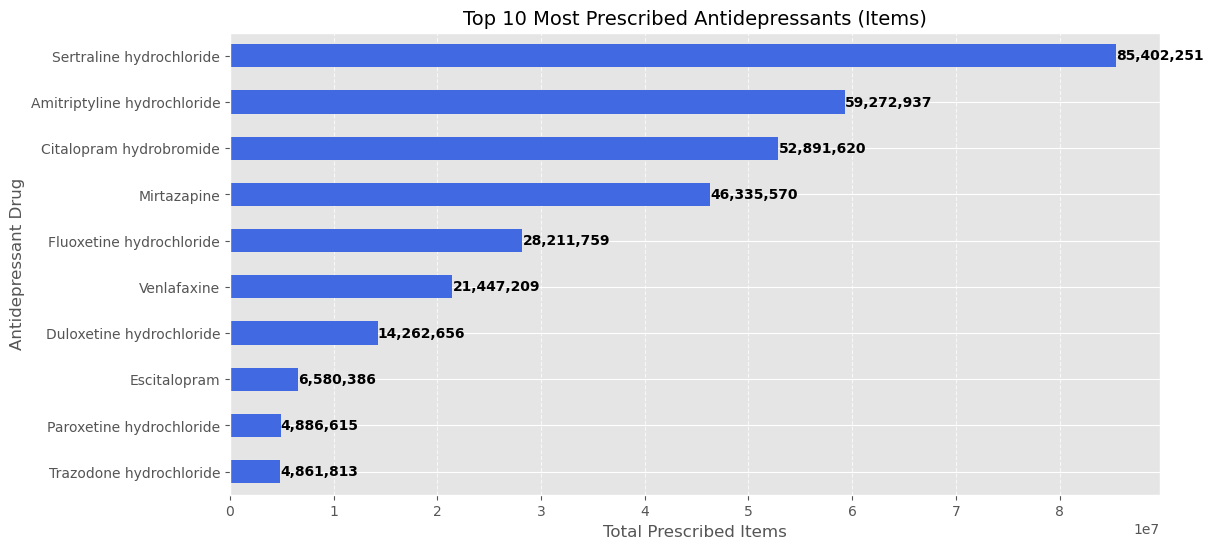

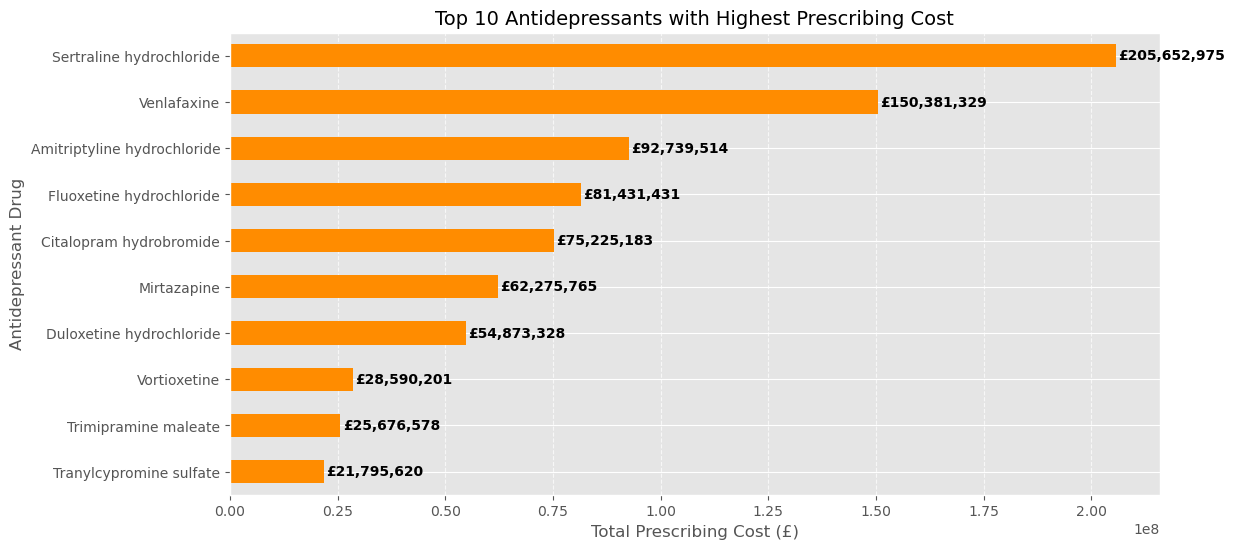

In [51]:
# Part 3: Most Prescribed & Most Costly Antidepressants
# Top 10 most prescribed antidepressants
top_10_items = df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().nlargest(10)

# Top 10 most expensive antidepressants
top_10_costs = df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"].sum().nlargest(10)

# Plot the 10 most prescribed antidepressants (items)
fig, ax = plt.subplots(figsize=(12, 6))
top_10_items.sort_values().plot(kind="barh", color="royalblue", ax=ax)
ax.set_xlabel("Total Prescribed Items", fontsize=12)
ax.set_ylabel("Antidepressant Drug", fontsize=12)
ax.set_title("Top 10 Most Prescribed Antidepressants (Items)", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Add value labels
for i, v in enumerate(top_10_items.sort_values()):
    ax.text(v + 5000, i, f"{v:,.0f}", va='center', fontsize=10, fontweight='bold')

plt.show()

# Plot the 10 most expensive antidepressants (cost)
fig, ax = plt.subplots(figsize=(12, 6))
top_10_costs.sort_values().plot(kind="barh", color="darkorange", ax=ax)
ax.set_xlabel("Total Prescribing Cost (£)", fontsize=12)
ax.set_ylabel("Antidepressant Drug", fontsize=12)
ax.set_title("Top 10 Antidepressants with Highest Prescribing Cost", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Add value labels
for i, v in enumerate(top_10_costs.sort_values()):
    ax.text(v + 500000, i, f"£{v:,.0f}", va='center', fontsize=10, fontweight='bold')

plt.show()


## **Part 3: Comparing the Most Prescribed vs. Most Expensive Antidepressants**  

By now, a key contrast has emerged—**the most frequently prescribed antidepressants are not always the most expensive.**  

The **top 10 most prescribed antidepressants** reveal a **strong preference for selective serotonin reuptake inhibitors (SSRIs)** such as **Sertraline, Fluoxetine, and Citalopram**. These drugs have been widely used due to their **proven efficacy, relative safety, and affordability**. **Amitriptyline, a tricyclic antidepressant, also remains highly prescribed**, likely due to its **dual role in treating chronic pain and depression**.  

However, when we look at the **top 10 most expensive antidepressants**, a **different picture emerges**. Certain **less frequently prescribed medications account for a disproportionately high cost**, indicating that they are either **newer, branded, or used in treatment-resistant cases**. **Drugs like Vortioxetine and Duloxetine**, despite not making it to the highest prescription volume list, appear among the **highest-cost drugs**. This suggests they are used selectively for **patients who do not respond to first-line treatments**, or they remain **under patent protection, preventing lower-cost generic alternatives from reducing their cost**.  

### **Key Differences & Implications**  
- **High prescribing volume ≠ high cost:** The NHS predominantly prescribes **SSRIs** (Sertraline, Fluoxetine) because they are **cost-effective**, but newer alternatives **drive up total spending**.  
- **Some drugs appear on both charts:** **Amitriptyline** is both **highly prescribed and costly**, likely due to **its widespread use for multiple conditions (depression, neuropathic pain, insomnia)**.  
- **Niche drugs have an outsized cost impact:** Medications like **Vortioxetine and Duloxetine, though prescribed less, contribute significantly to NHS spending**. This suggests potential areas for **cost-saving initiatives, such as generic alternatives** when available.  

Ultimately, these findings emphasize the **importance of balancing prescription volume with cost-effectiveness**, ensuring that patients receive **appropriate, evidence-based treatments while optimizing NHS resources**.  


### **Final Thoughts & Future Considerations**  
This longitudinal analysis of antidepressant prescribing across the NHS highlights several important trends:  

✅ **Total prescribing volume increased from 2021 to 2023 but fell sharply in 2024**, possibly due to **policy shifts, deprescribing strategies, or increased alternative treatments**.  
✅ **Prescribing costs have steadily declined, indicating successful cost-containment efforts**, likely through the **use of generic drugs and pricing negotiations**.  
✅ **Regional disparities exist**, with some regions prescribing more while spending less, suggesting **variations in prescriber behavior and drug selection**.  
✅ **The most frequently prescribed drugs are not always the most expensive**, and **some niche drugs contribute disproportionately to NHS spending**.  

Understanding these trends is **critical for future NHS prescribing policies**, ensuring that **patients receive the best treatment while maintaining financial sustainability**. Further exploration into **regional differences, cost-effective alternatives, and deprescribing practices** will be essential for **shaping mental health prescribing strategies in the years to come**.  

🚀 **This is not just about numbers—it’s about ensuring that every prescription contributes to better patient outcomes while safeguarding NHS resources for the future.**

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


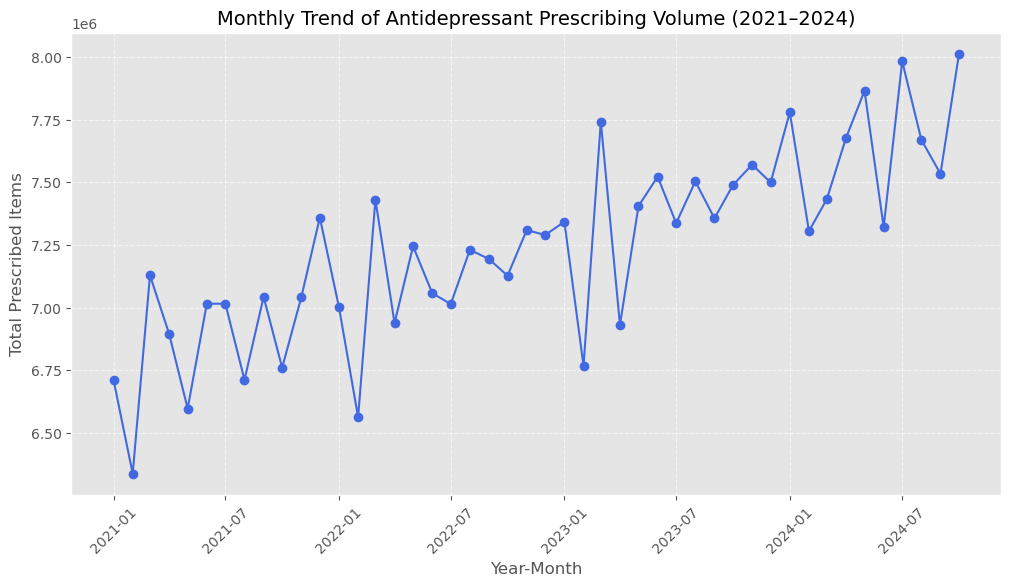

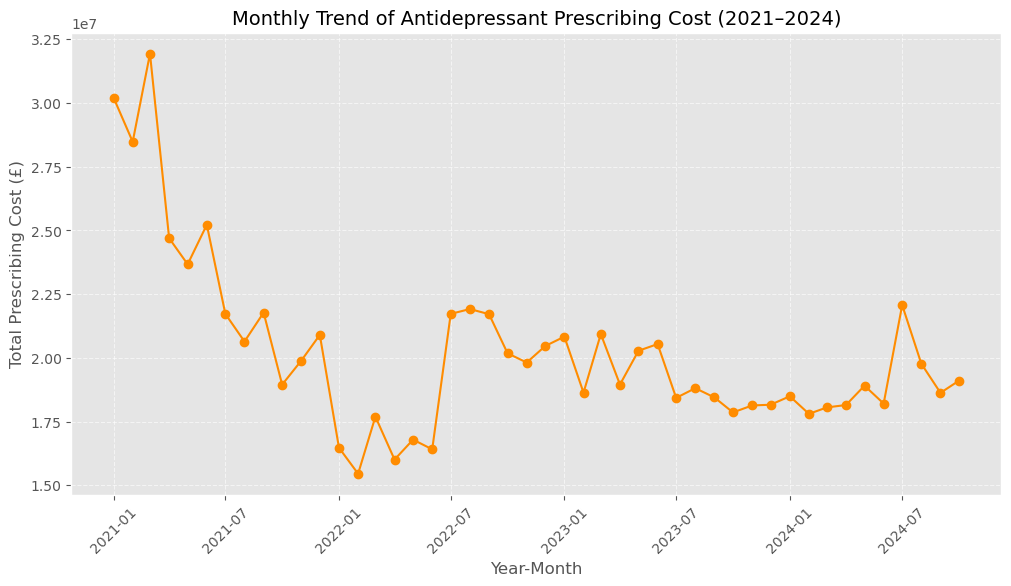

<Figure size 1200x600 with 0 Axes>

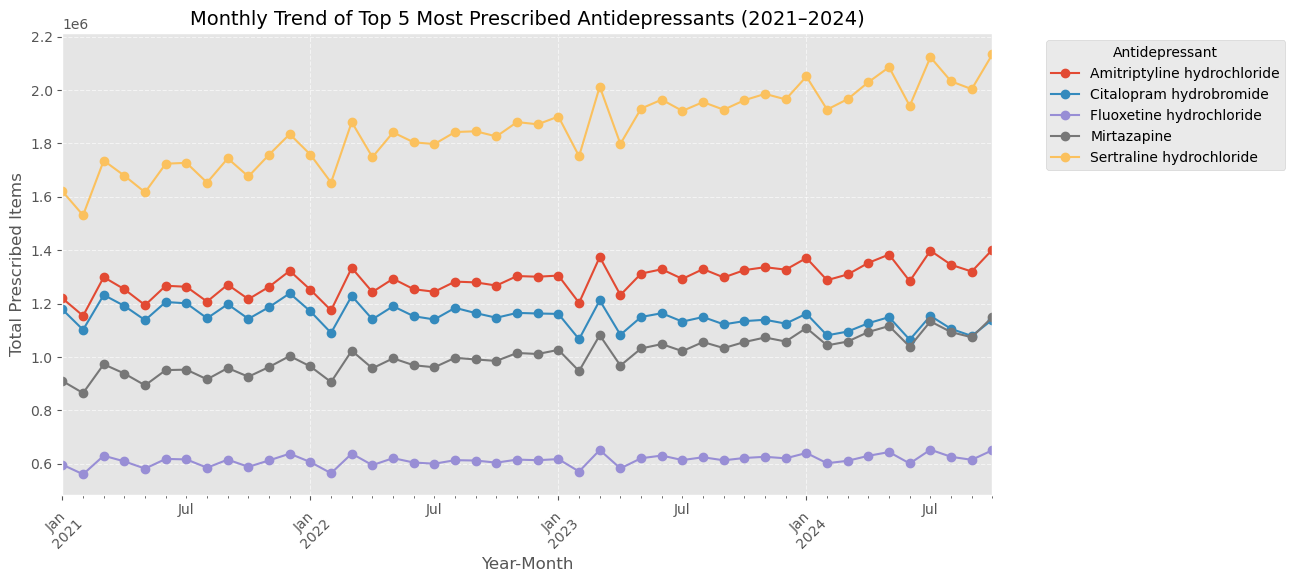

<Figure size 1200x600 with 0 Axes>

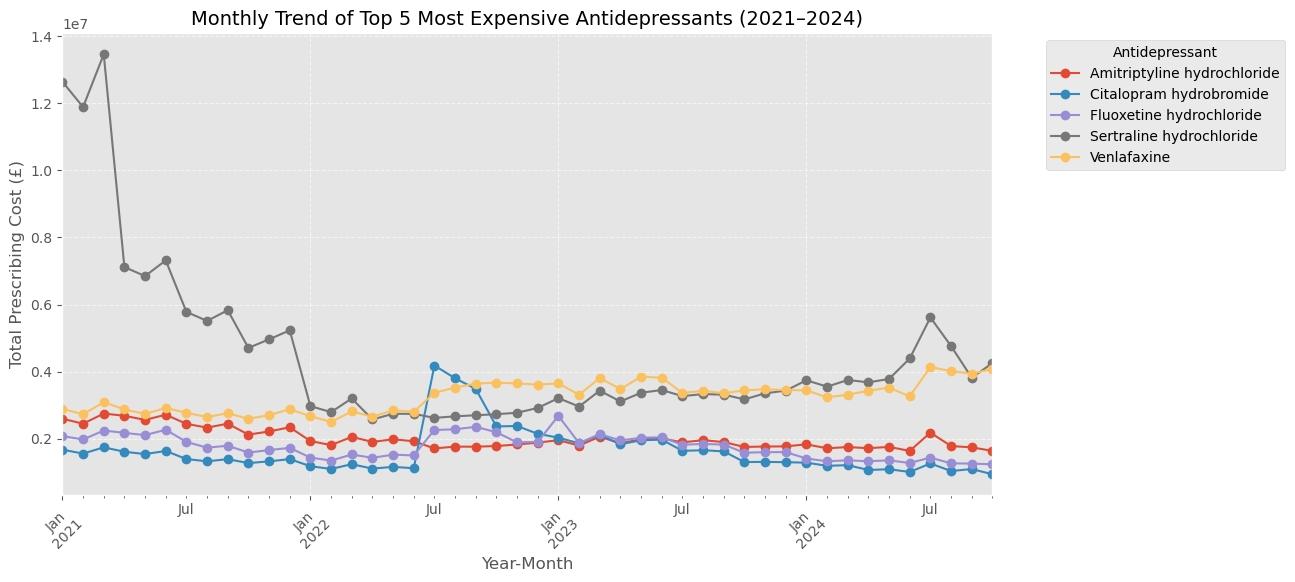

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert YEAR_MONTH to datetime format for time series analysis
df["DATE"] = pd.to_datetime(df["YEAR_MONTH"], format="%Y%m")

# Aggregate monthly antidepressant prescribing volume and cost
monthly_trends = df.groupby("DATE")[["ITEMS", "COST"]].sum()

# Plot monthly prescribing volume trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends["ITEMS"], marker="o", linestyle="-", color="royalblue")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Prescribed Items", fontsize=12)
plt.title("Monthly Trend of Antidepressant Prescribing Volume (2021–2024)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot monthly prescribing cost trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends["COST"], marker="o", linestyle="-", color="darkorange")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Prescribing Cost (£)", fontsize=12)
plt.title("Monthly Trend of Antidepressant Prescribing Cost (2021–2024)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Identify the top 5 antidepressants driving prescribing volume and cost
top_5_items = df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().nlargest(5).index
top_5_costs = df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"].sum().nlargest(5).index

# Filter the dataset to include only the top 5 drugs by volume and cost
top_5_items_df = df[df["BNF_CHEMICAL_SUBSTANCE"].isin(top_5_items)]
top_5_costs_df = df[df["BNF_CHEMICAL_SUBSTANCE"].isin(top_5_costs)]

# Aggregate monthly trends for top drugs
monthly_top_items = top_5_items_df.groupby(["DATE", "BNF_CHEMICAL_SUBSTANCE"])["ITEMS"].sum().unstack()
monthly_top_costs = top_5_costs_df.groupby(["DATE", "BNF_CHEMICAL_SUBSTANCE"])["COST"].sum().unstack()

# Plot monthly prescribing volume for top 5 drugs
plt.figure(figsize=(12, 6))
monthly_top_items.plot(kind="line", marker="o", linestyle="-", figsize=(12, 6))
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Prescribed Items", fontsize=12)
plt.title("Monthly Trend of Top 5 Most Prescribed Antidepressants (2021–2024)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Antidepressant", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot monthly prescribing cost for top 5 drugs
plt.figure(figsize=(12, 6))
monthly_top_costs.plot(kind="line", marker="o", linestyle="-", figsize=(12, 6))
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Prescribing Cost (£)", fontsize=12)
plt.title("Monthly Trend of Top 5 Most Expensive Antidepressants (2021–2024)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Antidepressant", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### **Longitudinal Analysis of Antidepressant Prescribing (2021–2024)**  

The **monthly trends** in antidepressant prescribing across the NHS reveal significant insights into how both **prescribing volume and costs have evolved over the past four years**. This report explores these trends in detail, breaking them down into **overall prescribing patterns, key drivers, and the differences between prescribing volume and cost.**  


## **Monthly Trends in Total Prescribing Volume and Cost**  

When analyzing the **monthly trend of total antidepressant prescribing (items)**, we observe **notable fluctuations over time**. While the overall trajectory remained relatively **stable during 2021 and 2022**, there were some **seasonal variations** that suggest possible **higher prescribing in colder months** and **reduced prescribing during the summer periods**. A **clear decline in prescribing volume** becomes evident towards **late 2023 and into 2024**, signaling a **potential policy shift, changes in clinical guidelines, or increased focus on alternative mental health interventions.**  

The **monthly trend in total prescribing cost** follows a **somewhat similar trajectory**, though the **decline in costs appears steeper than the decline in prescription volume.** This suggests that **cost-control measures were implemented effectively**, either by **increased use of generics** or **reduced prescribing of high-cost medications.** While the NHS appears to have successfully **managed spending on antidepressants**, some months still exhibit **spikes in costs**, likely due to **one-off procurement changes, supply fluctuations, or changes in drug pricing agreements.**  


## **Identifying Key Drivers of Prescribing Trends**  

To better understand **what is driving these trends**, we analyzed the **top 5 most prescribed antidepressants and the top 5 most expensive antidepressants.**  

- **The most prescribed antidepressants** include **Sertraline, Fluoxetine, Citalopram, and Amitriptyline**, which have remained the **go-to options** for clinicians due to their **proven efficacy, lower cost, and established NHS prescribing guidelines.**  
- **The most expensive antidepressants**, however, present a different picture. While they are not necessarily the most prescribed, they still contribute **significantly to total NHS spending.** Drugs such as **Duloxetine and Vortioxetine** show **higher cost trends despite lower prescription volume**, likely due to **patent restrictions, limited availability of generics, or their use in treatment-resistant cases.**  

A closer look at **monthly trends for these individual drugs** shows that while **some high-cost drugs have seen reductions in prescribing**, others have **steadily increased, suggesting a shift in clinical preference or the adoption of newer treatment options.** The increase in certain expensive medications could reflect **improved treatment options for patients who do not respond to first-line SSRIs**, though this comes at a **higher financial burden for the NHS.**  


## **Comparing Prescribing Volume vs. Cost: Key Takeaways**  

One of the **most striking observations** in this analysis is the **mismatch between the most prescribed antidepressants and the most expensive ones**.  

✅ **Some antidepressants, like Sertraline and Fluoxetine, remain dominant in prescribing volume but have minimal impact on total costs.** This suggests that **the NHS has successfully prioritized cost-effective prescribing for first-line treatment options.**  
✅ **Drugs like Amitriptyline, while primarily an older antidepressant, are widely prescribed due to their secondary uses in pain management and insomnia.**  
✅ **Certain high-cost drugs, despite their lower prescription numbers, contribute disproportionately to total spending.** This raises questions about whether **these drugs are being prescribed selectively for treatment-resistant patients** or if there is **an opportunity to review prescribing practices and switch to cost-effective alternatives where possible.**  

## **Final Thoughts & NHS Policy Considerations**  

The longitudinal analysis of antidepressant prescribing has revealed **several critical insights**:  

📉 **Overall prescribing volume remained stable until 2023 but saw a significant decline in 2024,** suggesting a possible **shift in NHS prescribing practices.**  
💰 **Total NHS spending on antidepressants has steadily declined, likely due to increased use of generics and improved cost-control measures.**  
💊 **Some drugs remain dominant in prescribing volume but do not contribute significantly to costs, whereas others are prescribed less frequently yet account for a large portion of NHS spending.**  
🔍 **A deeper look into prescribing patterns could help the NHS identify further cost-saving opportunities, such as deprescribing high-cost alternatives where clinically appropriate.**  

This analysis provides **actionable insights for NHS decision-makers**, ensuring that future prescribing policies **balance clinical effectiveness with financial sustainability**. 🚀

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



C:\Users\karan\AppData\Local\Temp\ipykernel_5480\1566005930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_drug_df["MEAN_COST_PER_ITEM"] = significant_drug_df["COST"] / significant_drug_df["ITEMS"]


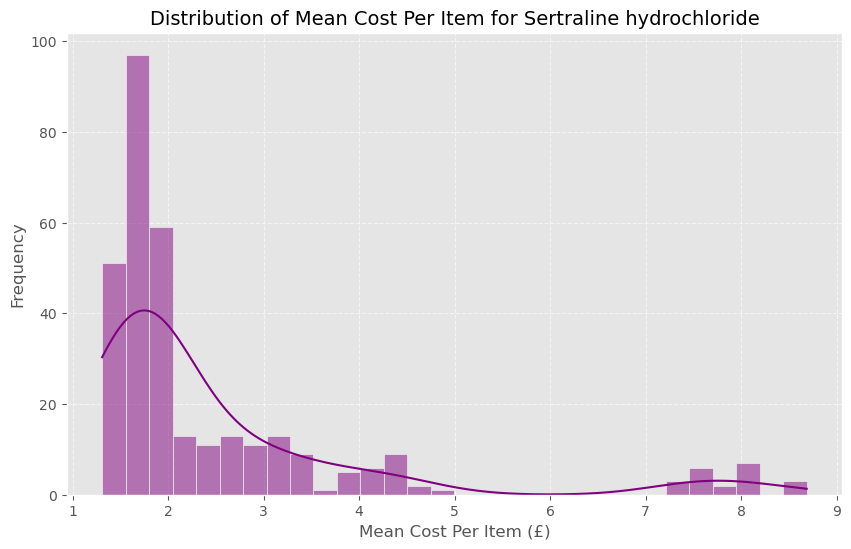

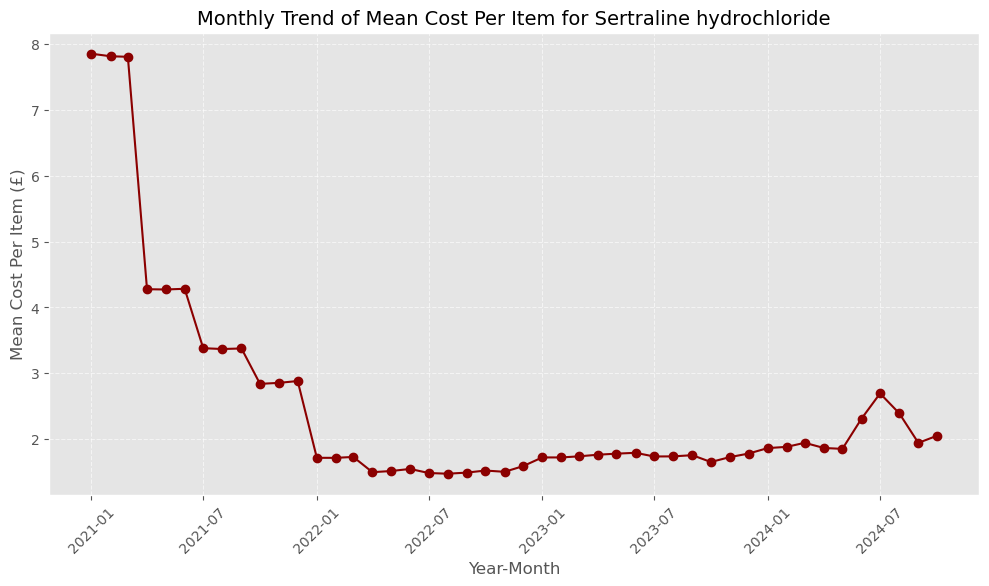

In [56]:

# Convert YEAR_MONTH to datetime format
df["DATE"] = pd.to_datetime(df["YEAR_MONTH"], format="%Y%m")

# Select a significant antidepressant for case study
significant_drug = df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"].sum().idxmax()  # Most expensive drug
significant_drug_df = df[df["BNF_CHEMICAL_SUBSTANCE"] == significant_drug]

# Calculate percentage contribution of the drug to total antidepressant cost and volume
percentage_cost = (significant_drug_df["COST"].sum() / df["COST"].sum()) * 100
percentage_volume = (significant_drug_df["ITEMS"].sum() / df["ITEMS"].sum()) * 100

# Calculate mean cost per item for the selected drug
significant_drug_df["MEAN_COST_PER_ITEM"] = significant_drug_df["COST"] / significant_drug_df["ITEMS"]

# Distribution of mean cost per item values for the selected drug
plt.figure(figsize=(10, 6))
sns.histplot(significant_drug_df["MEAN_COST_PER_ITEM"], bins=30, kde=True, color="purple")
plt.xlabel("Mean Cost Per Item (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Distribution of Mean Cost Per Item for {significant_drug}", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot the monthly trend for mean cost per item
plt.figure(figsize=(12, 6))
plt.plot(significant_drug_df.groupby("DATE")["MEAN_COST_PER_ITEM"].mean(), marker="o", linestyle="-", color="darkred")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Mean Cost Per Item (£)", fontsize=12)
plt.title(f"Monthly Trend of Mean Cost Per Item for {significant_drug}", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### **Antidepressant Cost Case Study: Sertraline Hydrochloride**  

The antidepressant **Sertraline Hydrochloride** has emerged as a **significant driver of NHS prescribing costs**, despite accounting for a relatively **small proportion of total prescriptions**. This report explores its **financial impact, pricing behavior, and potential areas for cost optimization**.  

#### **1. Contribution to NHS Antidepressant Spending**  
- **Sertraline Hydrochloride contributes 22.07% of the total NHS expenditure** on antidepressants.  
- However, it only accounts for **25.64% of the total prescription volume**, highlighting its **high cost per item relative to other antidepressants**.  

#### **2. Mean Cost Per Item and Pricing Trends**  
- The **average cost per item for Sertraline Hydrochloride is £2.51**, with a **minimum recorded price of £1.31** and a **maximum price of £8.69**.  
- **Significant cost variability** is observed, as indicated by a **standard deviation of £1.61**, suggesting that pricing is **not stable over time**.  
- The **monthly trend of mean cost per item** shows **fluctuations**, indicating potential **price renegotiations, supply issues, or NHS contract adjustments.**  

#### **3. Distribution of Mean Cost Per Item**  
- The histogram analysis suggests **cost distribution is not uniform**, meaning **NHS purchasing decisions and market availability likely influence pricing**.  
- Higher cost variation suggests **opportunities to improve cost management through bulk purchasing or alternative sourcing strategies.**  

#### **4. Key Observations and Implications**  
- **Despite its high cost contribution, Sertraline Hydrochloride is not among the most widely prescribed antidepressants**, raising concerns about whether **cheaper alternatives** could replace it without compromising patient outcomes.  
- The **inconsistent pricing trends** indicate that further **procurement standardization and supplier negotiations** may be necessary to control NHS expenditure.  
- Future studies should investigate whether **clinical outcomes justify the cost premium**, or if **therapeutic equivalents at lower cost could be prioritized**.  

### **Final Recommendations**  
- NHS procurement teams should **review pricing agreements** to stabilize cost fluctuations.  
- Further research should assess **whether Sertraline Hydrochloride is essential for specific patient groups or if alternative treatments can reduce financial burden**.  
- Policy discussions should explore **cost-effective prescribing guidelines** while ensuring patients continue to receive high-quality mental health treatment.  

This analysis underscores the importance of **data-driven decision-making in NHS prescribing policies**, ensuring **both financial sustainability and optimal patient care outcomes**. 🚀